In [2]:
import pandas as pd

df = pd.read_csv('train.csv').drop('id', axis=1)
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


In [4]:
df.describe()

,price
count,5.163500e+04
mean,4.532253e+05
std,1.793287e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.600000e+05
max,1.000000e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x3089ac080>,
 'caps': [<matplotlib.lines.Line2D at 0x3089ac680>,
 'boxes': [<matplotlib.lines.Line2D at 0x308973ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x3089acce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3089ad010>],
 'means': []}

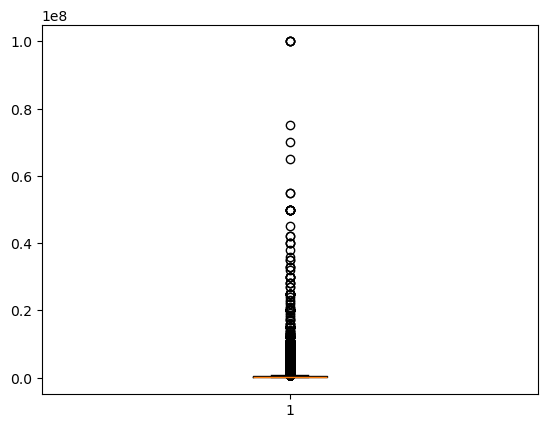

In [6]:
from matplotlib import pyplot as plt

plt.boxplot(df['price'])

In [8]:
df['plate_length'] = df['plate'].str.len()

In [10]:
df['plate_length'].value_counts()

plate_length
9    36195
8    15440
Name: count, dtype: int64

In [12]:
df.groupby('plate_length').describe().T

plate_length             8             9
price count   1.544000e+04  3.619500e+04
      mean    8.006511e+05  3.050210e+05
      std     2.813470e+06  1.066669e+06
      min     2.000000e+04  2.000000e+04
      25%     1.200000e+05  6.500000e+04
      50%     2.900000e+05  1.300000e+05
      75%     6.000000e+05  2.900000e+05
      max     1.000000e+08  1.000000e+08

In [14]:
# Split region and registration code from the plate

df['region'] = df['plate'].apply(lambda x: x[-2:] if len(x) == 8 else x[-3:])
df['registration_code'] = df['plate'].apply(lambda x: x[1:4])
df['series'] = df['plate'].apply(lambda x: x[0] + x[4:6])

In [16]:
df

,plate,date,price,plate_length,region,registration_code,series
0,X059CP797,2024-12-26 00:00:00,65000,9,797,059,XCP
1,Y800MH790,2024-07-12 21:31:37,100000,9,790,800,YMH
2,A212TX77,2024-04-18 00:00:00,290000,8,77,212,ATX
3,P001AY199,2025-01-03 00:27:15,680000,9,199,001,PAY
4,P001AY199,2025-01-10 09:32:41,750000,9,199,001,PAY
...,...,...,...,...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000,9,797,023,XPP
51631,M004KA161,2025-01-31 00:00:00,1600000,9,161,004,MKA
51632,E888EB199,2025-02-06 00:00:00,850000,9,199,888,EEB
51633,X023XK77,2024-04-24 11:30:07,150000,8,77,023,XXK


In [18]:
# Expensive plates
df[df['price'] > 100000000 * 0.50]

,plate,date,price,plate_length,region,registration_code,series
1794,K252KK777,2024-10-14 00:00:00,100000000,9,777,252,KKK
14331,A777YX77,2024-01-25 16:37:41,65000000,8,77,777,AYX
14334,A777YX77,2024-06-12 13:30:08,55000000,8,77,777,AYX
21108,M026MM08,2024-03-30 00:00:00,100000000,8,08,026,MMM
22175,B888OP88,2024-06-15 00:00:00,55000500,8,88,888,BOP
41264,O039CA39,2024-07-02 00:00:00,75000000,8,39,039,OCA
43878,B777CY77,2024-08-02 00:00:00,100000000,8,77,777,BCY
47081,X777XX05,2024-06-24 00:00:00,100000000,8,05,777,XXX
47086,Y293TY193,2024-02-10 00:00:00,70000000,9,193,293,YTY


In [20]:
# get the mean price for each duplicate plate
df['price'] = df.groupby('plate')['price'].transform('mean')
df = df.drop_duplicates(subset='plate').reset_index(drop=True)
df.describe()

,price,plate_length
count,4.360500e+04,43605.000000
mean,4.370113e+05,8.695723
std,1.819148e+06,0.460106
min,2.000000e+04,8.000000
25%,7.000000e+04,8.000000
50%,1.500000e+05,9.000000
75%,3.500000e+05,9.000000
max,1.000000e+08,9.000000


In [22]:
df.head()

,plate,date,price,plate_length,region,registration_code,series
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,059,XCP
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,YMH
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,ATX
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,001,PAY
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,BBB


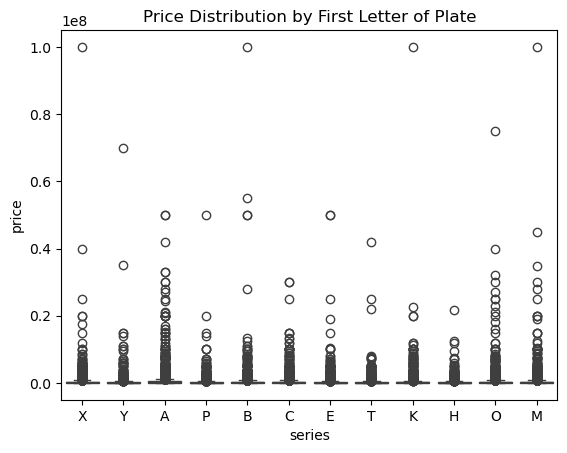

In [24]:
# findout whether the first letter is important or not 

# df.groupby('digit_1').describe()['price']


import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat((df['series'].apply(lambda x: x[0]), df['price']), axis=1)

sns.boxplot(x='series', y='price', data=data)
plt.title('Price Distribution by First Letter of Plate')
plt.show()

In [25]:
import pandas as pd
import scipy.stats as stats


data = pd.concat((df['series'].apply(lambda x: x[0]), df['price']), axis=1)


groups = [group["price"].values for _, group in data.groupby("series")]

h_stat, p_value = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 411.47589729490534, p-value: 2.237479124003958e-81


as we see we have more monotonic correlation instead of linear.

In [29]:
def digit_symmetry(plate):
    registration = plate[1:4]
    region = plate[6:]
    nums = registration + region

    return int(nums == nums[::-1])

df['digit_symmetry'] = df['plate'].apply(digit_symmetry)

In [31]:
df['registration_symmetry'] = df['registration_code'].apply(lambda x: int(x == x[::-1]))

In [33]:
df['region_symmetry'] = df['region'].apply(lambda x: int(x == x[::-1]))

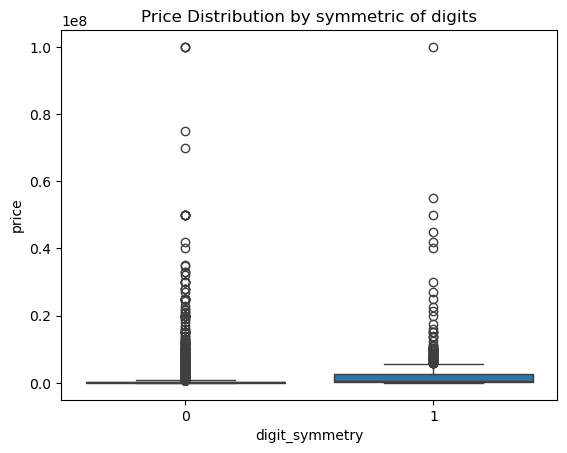

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='digit_symmetry', y='price', data=df)
plt.title('Price Distribution by symmetric of digits')
plt.show()

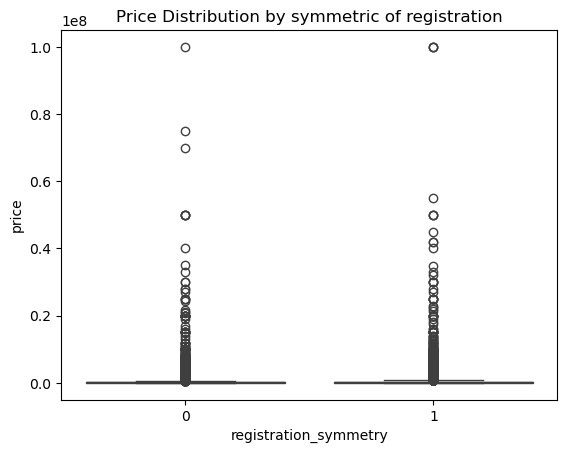

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='registration_symmetry', y='price', data=df)
plt.title('Price Distribution by symmetric of registration')
plt.show()

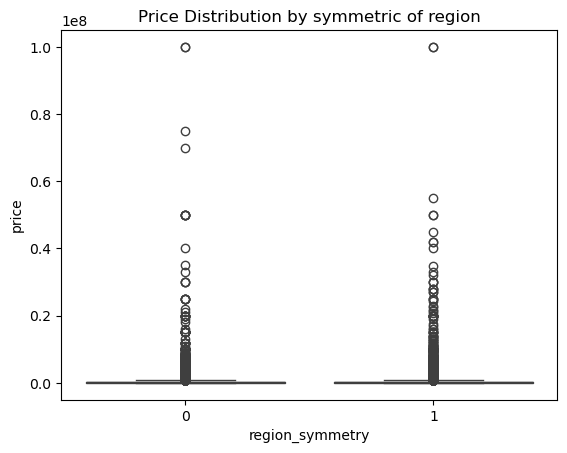

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='region_symmetry', y='price', data=df)
plt.title('Price Distribution by symmetric of region')
plt.show()

In [41]:
from collections import Counter


def frequency_score(num_str):
    counts = Counter(num_str)
    max_freq = max(counts.values())
    return round(max_freq / len(num_str), 2)

def frequency_score_plate(plate):
    registration = plate[1:4]
    region = plate[6:]
    digits = registration + region
    
    counts = Counter(digits)
    max_freq = max(counts.values())
    return round(max_freq / len(digits), 2)

In [43]:
df['digits_frequency'] = df['plate'].apply(frequency_score_plate)
df['region_frequency'] = df['region'].apply(frequency_score)
df['registration_frequency'] = df['registration_code'].apply(frequency_score) 

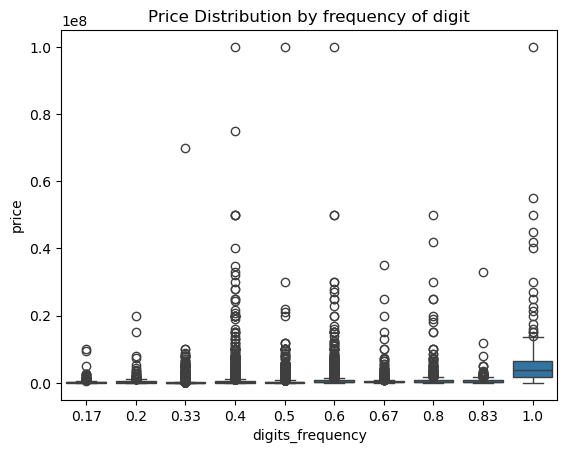

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.boxplot(x='digits_frequency', y='price', data=df)
plt.title('Price Distribution by frequency of digit')

plt.show()

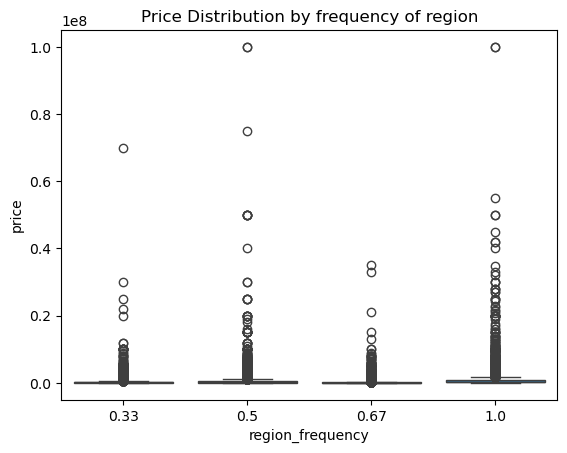

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.boxplot(x='region_frequency', y='price', data=df)
plt.title('Price Distribution by frequency of region')

plt.show()

In [49]:
df['registration_frequency'].describe()

count    43605.000000
mean         0.624209
std          0.216875
min          0.330000
25%          0.330000
50%          0.670000
75%          0.670000
max          1.000000
Name: registration_frequency, dtype: float64

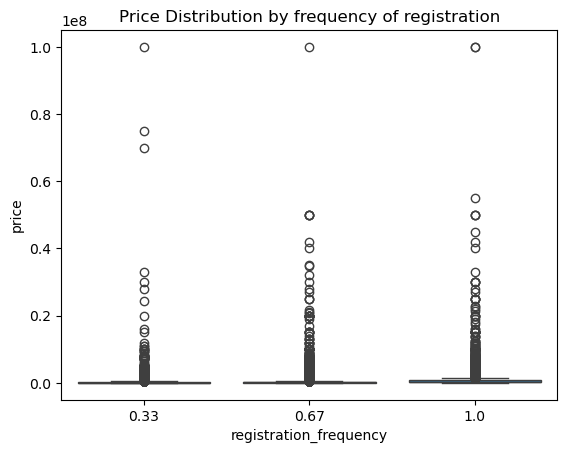

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.boxplot(x='registration_frequency', y='price', data=df)
plt.title('Price Distribution by frequency of registration')

plt.show()

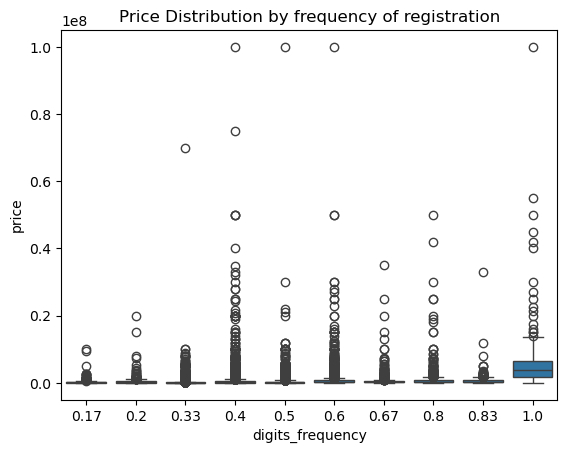

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.boxplot(x='digits_frequency', y='price', data=df)
plt.title('Price Distribution by frequency of registration')

plt.show()

In [55]:
df

,plate,date,price,plate_length,region,registration_code,series,digit_symmetry,registration_symmetry,region_symmetry,digits_frequency,region_frequency,registration_frequency
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,059,XCP,0,0,1,0.33,0.67,0.33
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,YMH,0,0,0,0.50,0.33,0.67
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,ATX,0,1,1,0.40,1.00,0.67
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,001,PAY,0,0,0,0.33,0.67,0.67
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,BBB,0,0,0,0.50,0.33,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,023,XPP,0,0,1,0.33,0.67,0.33
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,004,MKA,0,0,1,0.33,0.67,0.67
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,EEB,0,1,0,0.50,0.67,1.00
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,023,XXK,0,0,1,0.40,1.00,0.33


<Axes: >

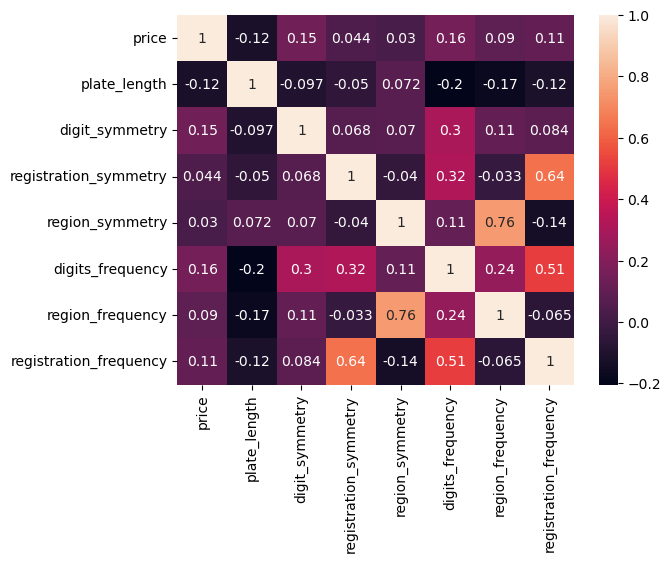

In [57]:
import seaborn as sns


corr = df.select_dtypes(['int64', 'float64']).corr(method='pearson')
sns.heatmap(corr, annot=True)

<Axes: >

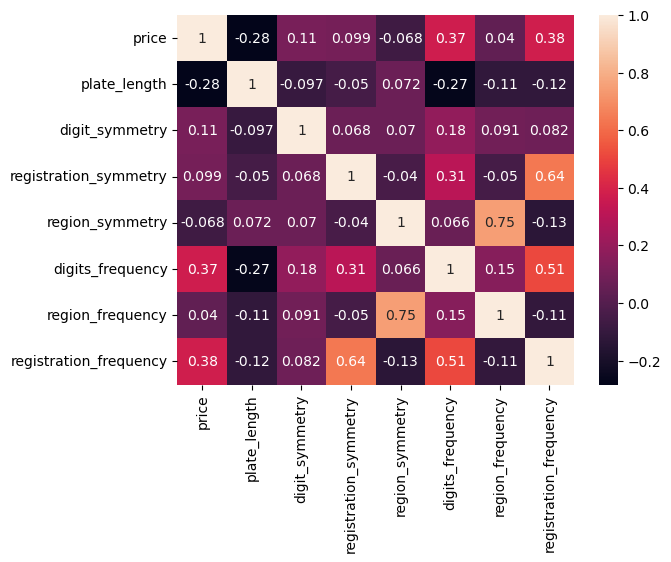

In [59]:
import seaborn as sns


corr = df.select_dtypes(['int64', 'float64']).corr(method='spearman')
sns.heatmap(corr, annot=True)

In [61]:
df['series_symmetry'] = df['series'].apply(lambda x: int(x == x[::-1]))

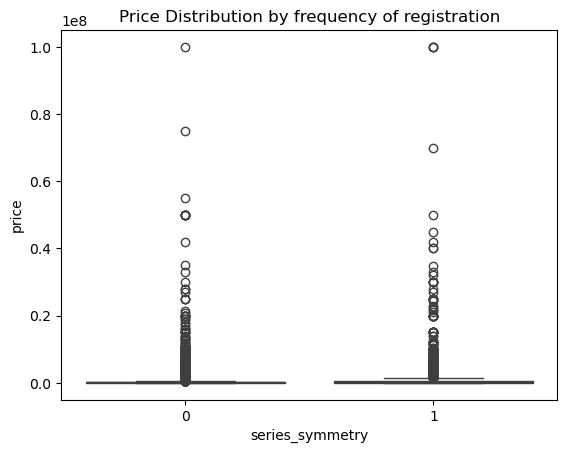

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.boxplot(x='series_symmetry', y='price', data=df)
plt.title('Price Distribution by frequency of registration')

plt.show()

In [65]:
import pandas as pd
import scipy.stats as stats


groups = [group["price"].values for _, group in df.groupby("series_symmetry")]

h_stat, p_value = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 1802.3546252204658, p-value: 0.0


In [67]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

                 date  year  month  day  hour  day_of_week
0 2024-12-26 00:00:00  2024     12   26     0            3
1 2024-07-12 21:31:37  2024      7   12    21            4
2 2024-04-18 00:00:00  2024      4   18     0            3
3 2025-01-03 00:27:15  2025      1    3     0            4
4 2022-04-09 00:00:00  2022      4    9     0            5


<Axes: xlabel='year', ylabel='price'>

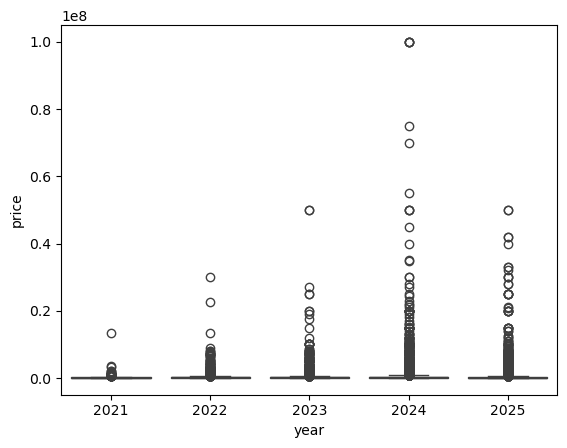

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(
    data=df,
    x='year',
    y='price')

## Encoding

In [136]:
unique_letters = set(''.join(df['plate'].str.extractall('([A-Z])')[0].tolist()))

letters = sorted(unique_letters)
letters

['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']

In [156]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

data = pd.DataFrame(
    {
        'char_1': df['series'].apply(lambda x: x[0]),
        'char_2': df['series'].apply(lambda x: x[1]),
        'char_3': df['series'].apply(lambda x: x[2]),
    }
)

encoded_features = encoder.fit_transform(data)

encoded_df = pd.DataFrame(encoded_features, 
                          columns=encoder.get_feature_names_out(['char_1', 'char_2', 'char_3']))

df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded

,plate,date,price,plate_length,region,registration_code,series,digit_symmetry,registration_symmetry,region_symmetry,...,char_3_C,char_3_E,char_3_H,char_3_K,char_3_M,char_3_O,char_3_P,char_3_T,char_3_X,char_3_Y
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,059,XCP,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,YMH,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,ATX,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,001,PAY,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,BBB,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,023,XPP,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,004,MKA,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,EEB,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,023,XXK,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
def count_same_middle_digits(plate):
    middle_digits = plate[1:4] 
    return sum(middle_digits.count(d) for d in set(middle_digits) if middle_digits.count(d) > 1)

df_encoded['same_middle_digits_count'] = df_encoded['plate'].apply(count_same_middle_digits)


In [70]:
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,same_last_digits_count,same_middle_digits_count
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,2,2
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,2,2
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,2,0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,2
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2,3
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0


In [72]:
def count_last_digits(plate):
    middle_digits = plate[6:] 
    return sum(middle_digits.count(d) for d in set(middle_digits) if middle_digits.count(d) > 1)

df_encoded['same_last_digits_count'] = df_encoded['plate'].apply(count_last_digits)

In [74]:
df_encoded['same_digits_count'] = df_encoded['same_middle_digits_count']+df_encoded['same_last_digits_count']
    

In [76]:
df_encoded.drop(['same_middle_digits_count', 'same_last_digits_count'], axis=1, inplace=True)

In [78]:
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_E,digit_3_H,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [102]:
def has_two_same_middle_digits(plate):
    middle_digits = plate[1:4]  
    if len(set(middle_digits)) == 2:
        return 1
    else:
        return 0  
    
def has_three_same_middle_digits(plate):
    middle_digits = plate[1:4]  
    if len(set(middle_digits)) == 1 :
        return 1
    else:
        return 0

In [103]:
df_encoded["two_middle_same_number"] = df_encoded["plate"].apply(has_two_same_middle_digits)
df_encoded["three_middle_same_number"] = df_encoded["plate"].apply(has_three_same_middle_digits)
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,two_middle_same_number,three_middle_same_number
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1,0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1,0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0,0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0


In [104]:
def has_two_same_last_digits(plate):
    last_digits = plate[6:]  # Extract last digits
    if len(last_digits) == 2:  # If only two digits exist, check if they are the same
        return 1 if last_digits[0] == last_digits[1] else 0
    elif len(last_digits) == 3:  # If three digits exist, check if at least two match
        return 1 if len(set(last_digits)) < 3 else 0
    return 0  # Default case if something unexpected happens

def has_three_same_last_digits(plate):
    last_digits = plate[6:]  # Extract last digits
    if len(last_digits) < 3:  # If fewer than three digits, it's impossible to have three same
        return 0
    return 1 if len(set(last_digits)) == 1 else 0  # Check if all three digits are the same


In [105]:
df_encoded["two_last_same_number"] = df_encoded["plate"].apply(has_two_same_last_digits)
df_encoded["three_last_same_number"] = df_encoded["plate"].apply(has_three_same_last_digits)
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,two_middle_same_number,three_middle_same_number,two_last_same_number,three_last_same_number
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,0.0,1.0,0.0,0.0,0.0,2,0,0,1,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,0.0,2,1,0,0,0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,0.0,1.0,0.0,4,1,0,1,0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,0.0,1.0,4,1,0,1,0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,0.0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,0.0,1.0,0.0,0.0,0.0,4,0,0,1,0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,0.0,4,1,0,1,0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,0.0,5,0,1,1,0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,0.0,0.0,0.0,2,0,0,1,0


In [106]:
def has_two_same_word(plate):
    middle_digits = plate[4:6]  
    if len(set(middle_digits)) < 2:
        return 1
    else:
        return 0

In [107]:
df_encoded["two same word"] = df_encoded["plate"].apply(has_two_same_word)

In [108]:
df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,registration_consecutive_count,...,digit_3_P,digit_3_T,digit_3_X,digit_3_Y,same_digits_count,two_middle_same_number,three_middle_same_number,two_last_same_number,three_last_same_number,two same word
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,1,...,1.0,0.0,0.0,0.0,2,0,0,1,0,0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,2,...,0.0,0.0,0.0,0.0,2,1,0,0,0,0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1,...,0.0,0.0,1.0,0.0,4,1,0,1,0,0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,2,...,0.0,0.0,0.0,1.0,4,1,0,1,0,0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,2,...,0.0,0.0,0.0,0.0,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,1,...,1.0,0.0,0.0,0.0,4,0,0,1,0,1
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,2,...,0.0,0.0,0.0,0.0,4,1,0,1,0,0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,3,...,0.0,0.0,0.0,0.0,5,0,1,1,0,0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,1,...,0.0,0.0,0.0,0.0,2,0,0,1,0,0
